In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = "sales_data_with_discounts.csv"  # Ensure the file is in the same directory
df = pd.read_csv(file_path)
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [3]:
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [4]:
desc_stats = df[numerical_cols].agg(['mean', 'median', 'std']).T

# Add mode separately
modes = {}
for col in numerical_cols:
    modes[col] = df[col].mode().iloc[0] if not df[col].mode().empty else None

desc_stats['mode'] = desc_stats.index.map(modes)
desc_stats

,mean,median,std,mode
Volume,5.066667,4.000000,4.231602,3.000000
Avg Price,10453.433333,1450.000000,18079.904840,400.000000
Total Sales Value,33812.835556,5700.000000,50535.074173,24300.000000
Discount Rate (%),15.155242,16.577766,4.220602,5.007822
Discount Amount,3346.499424,988.933733,4509.902963,69.177942
Net Sales Value,30466.336131,4677.788059,46358.656624,326.974801


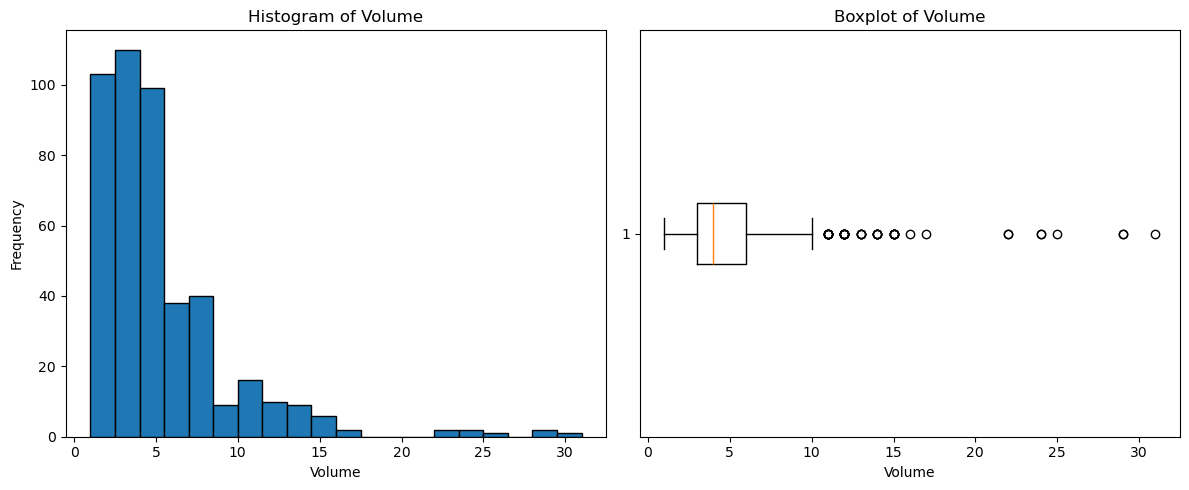

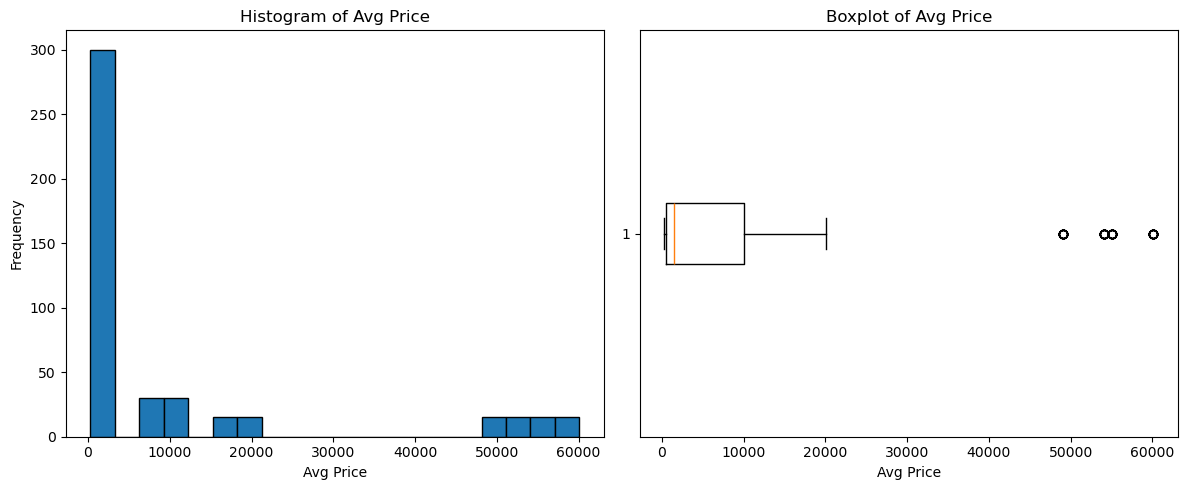

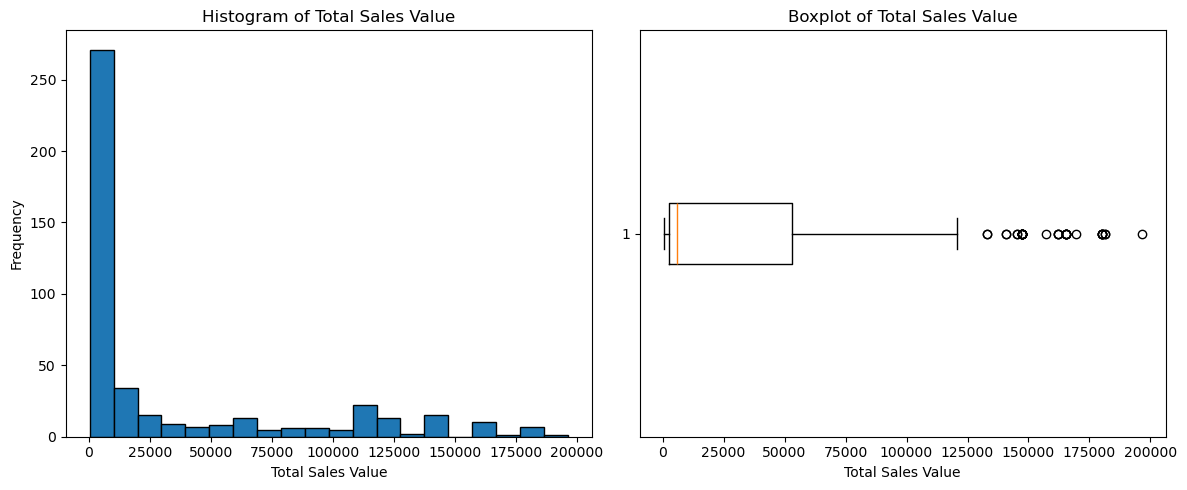

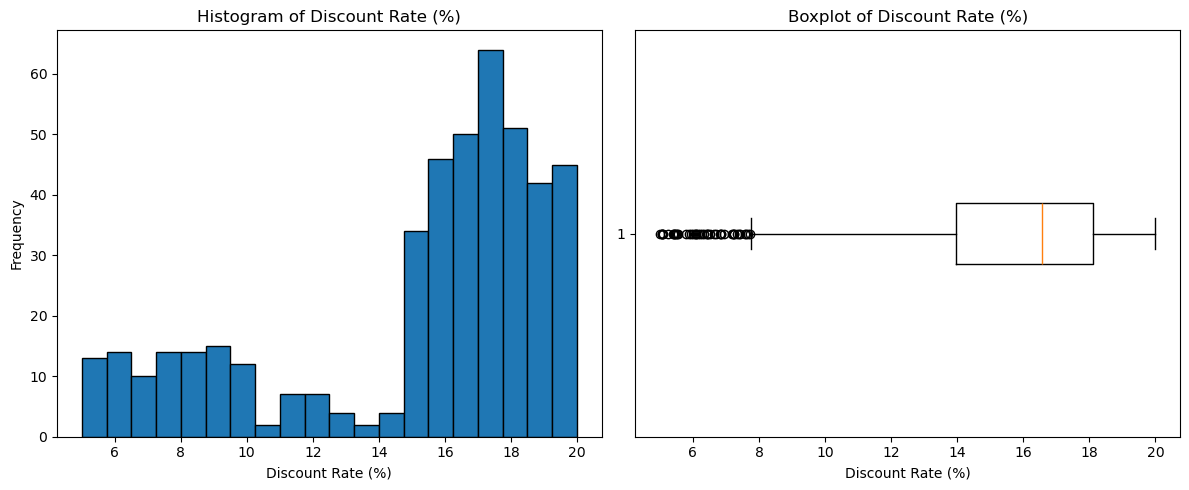

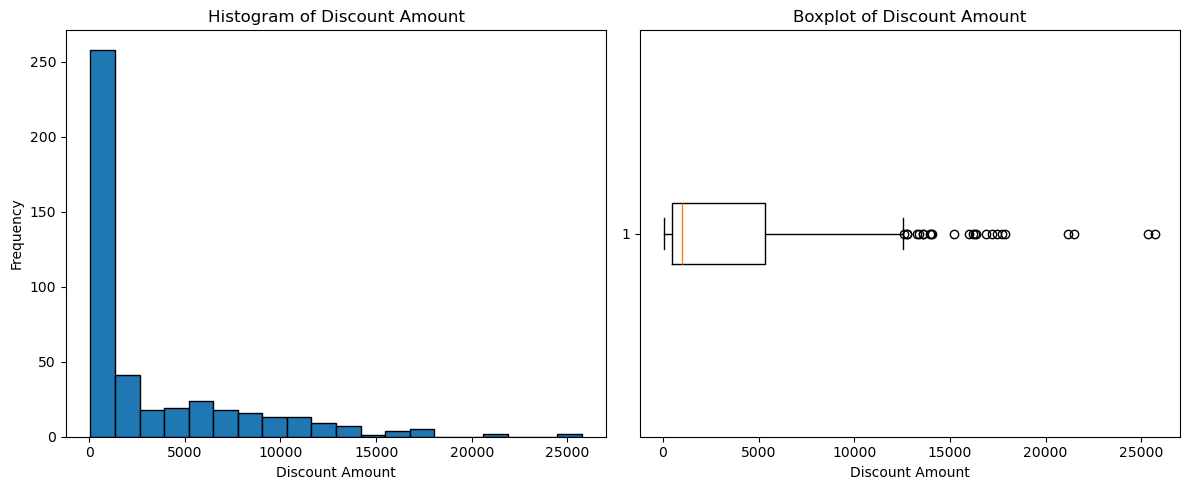

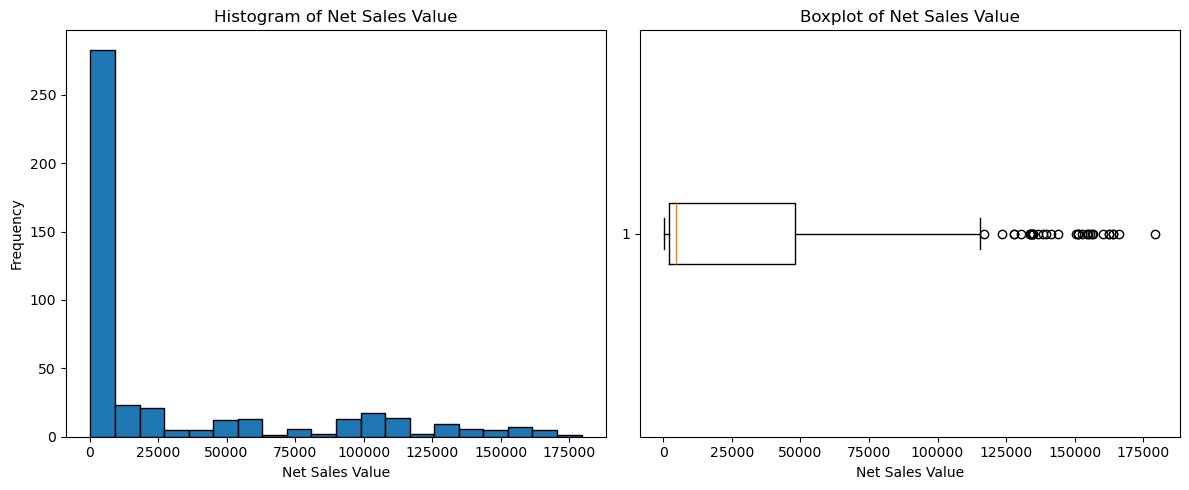

In [5]:
for col in numerical_cols:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(df[col].dropna(), bins=20, edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    
    # Boxplot
    plt.subplot(1, 2, 2)
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()

In [6]:
categorical_cols = df.select_dtypes(include=['object']).columns

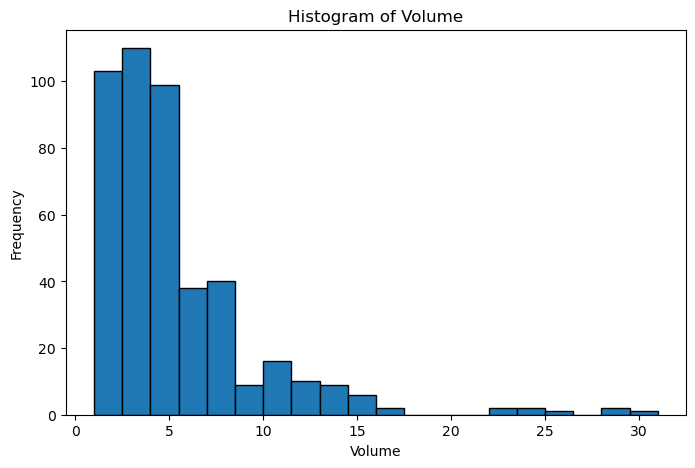

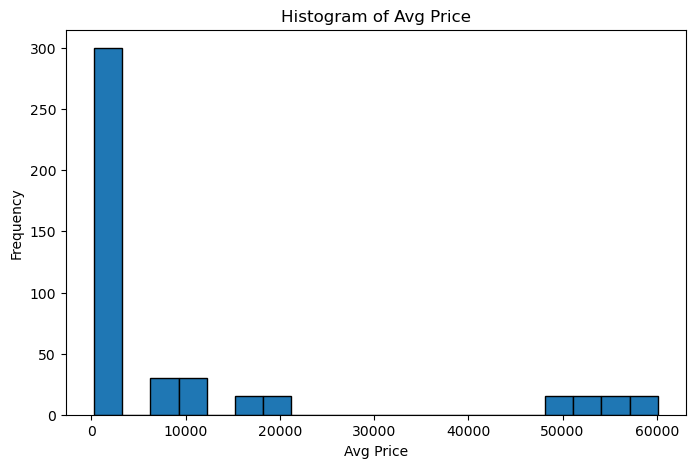

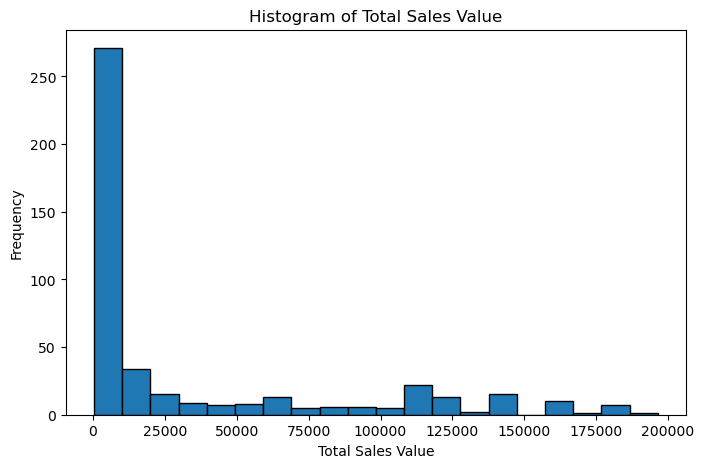

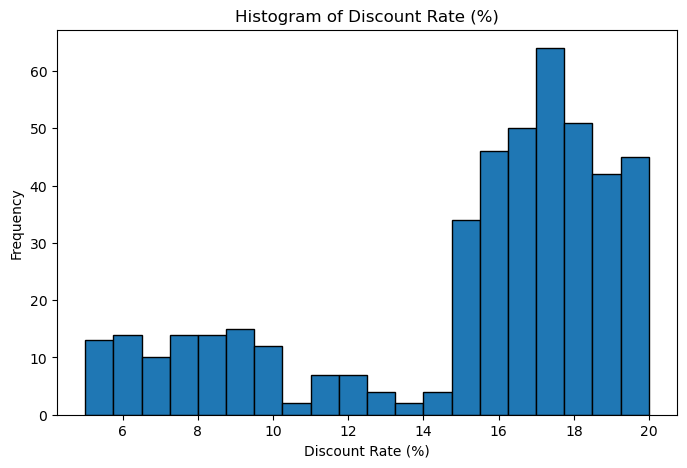

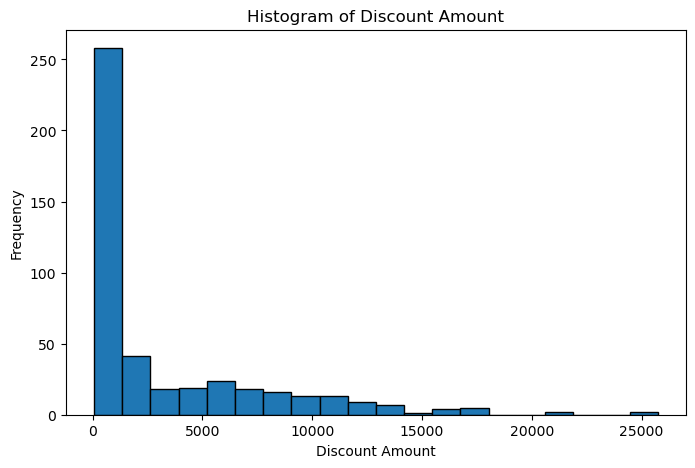

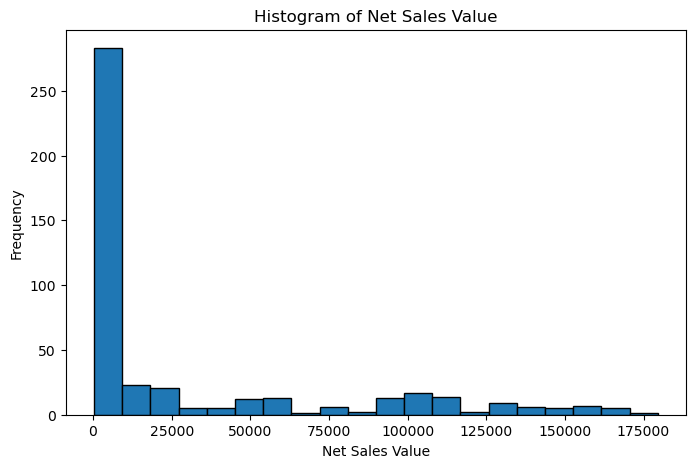

In [11]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col].dropna(), bins=20, edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
    
    

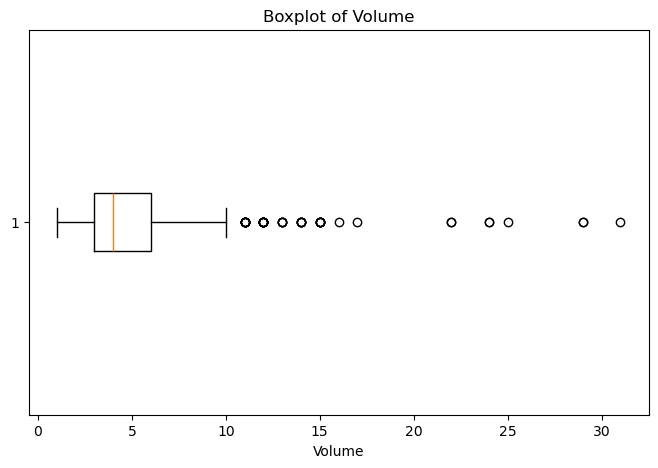

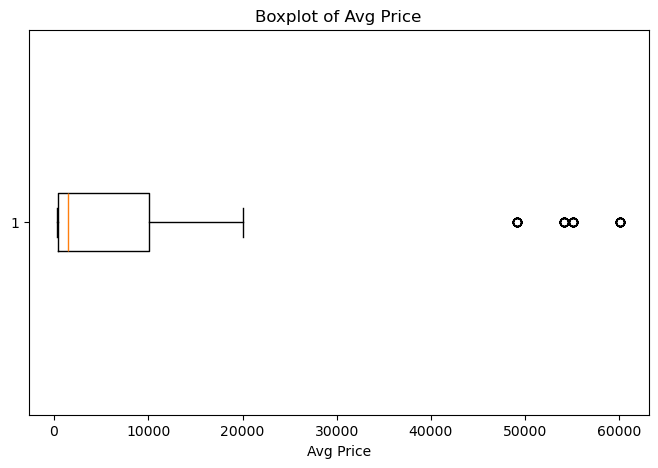

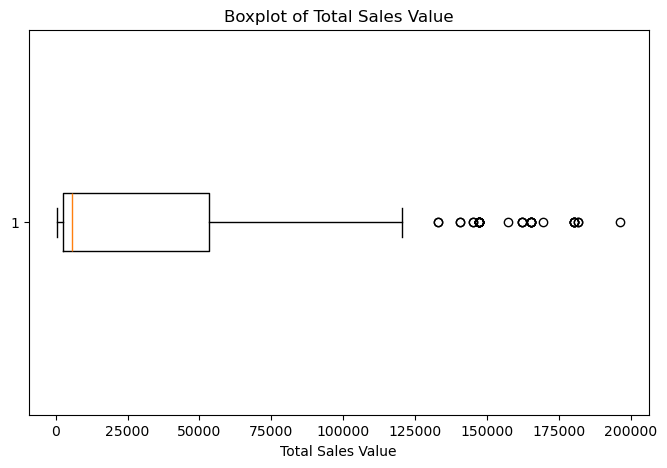

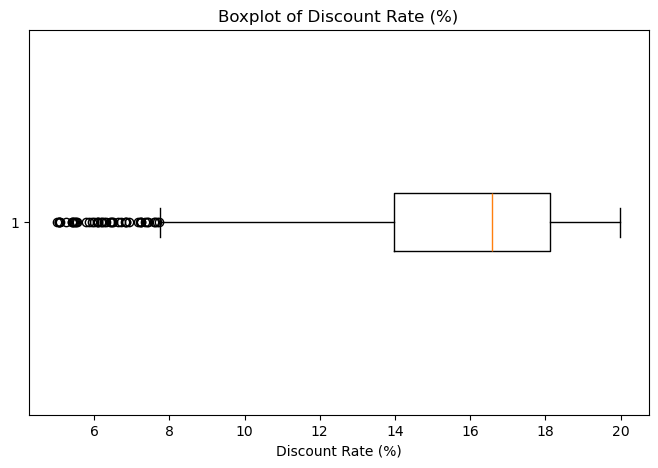

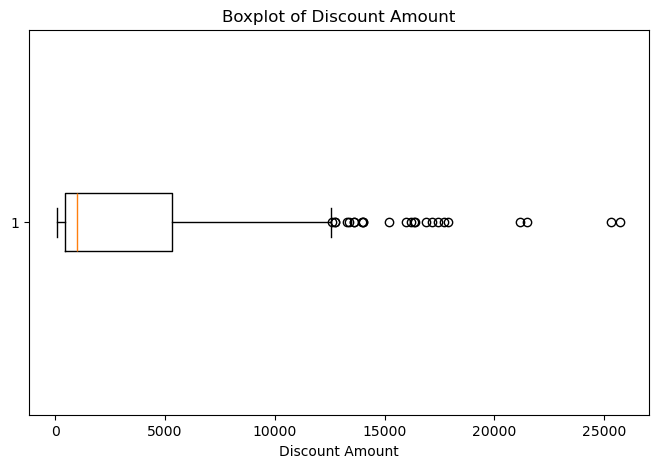

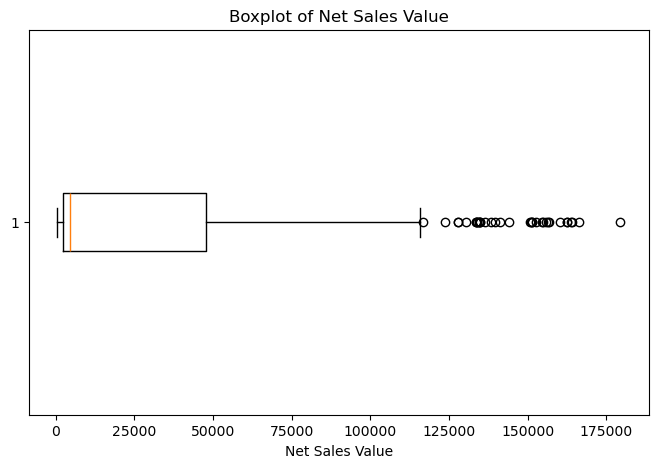

In [10]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()
    
    

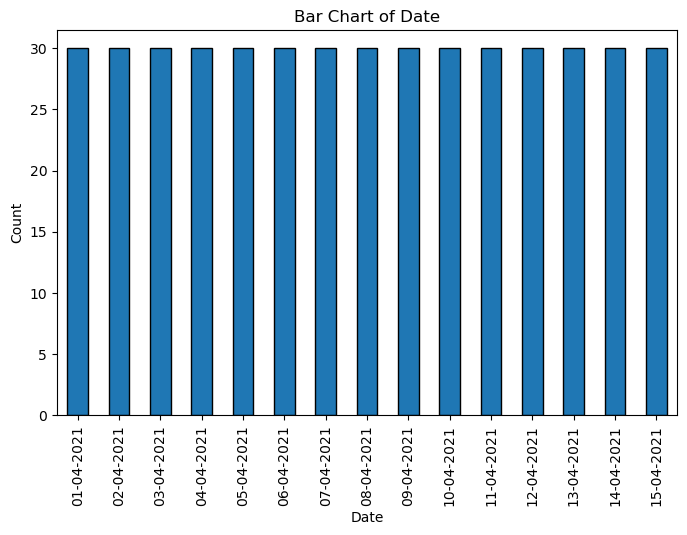

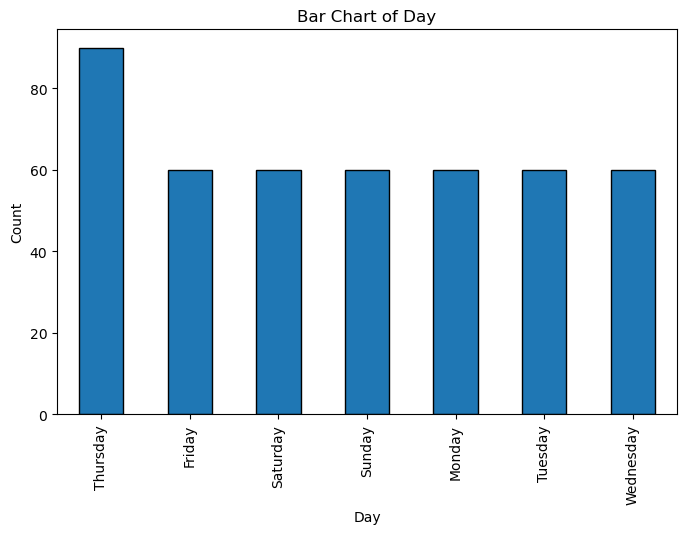

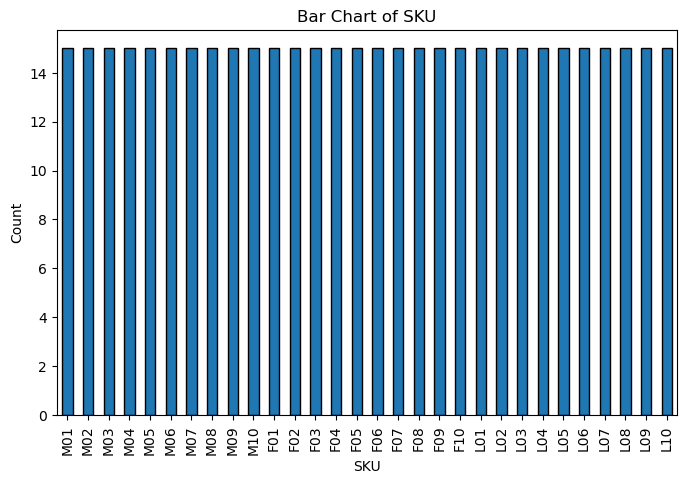

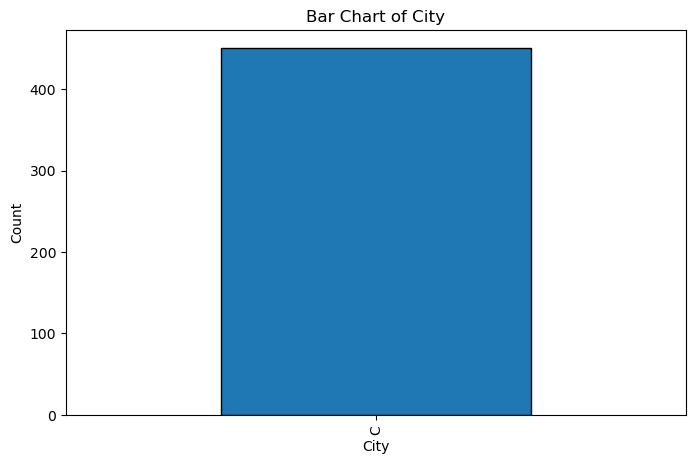

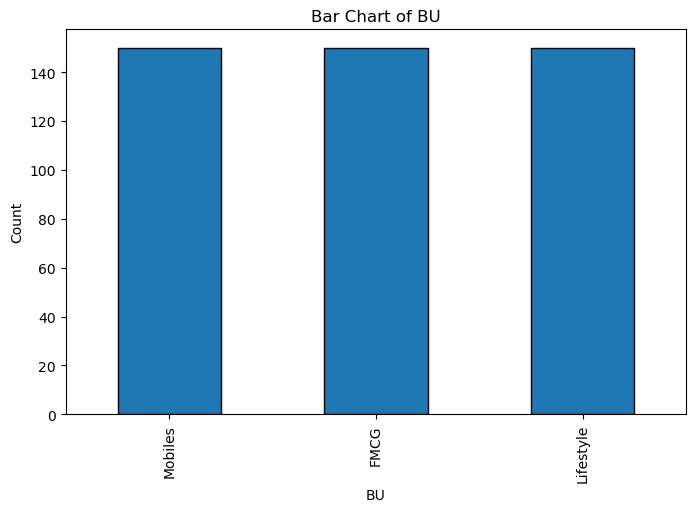

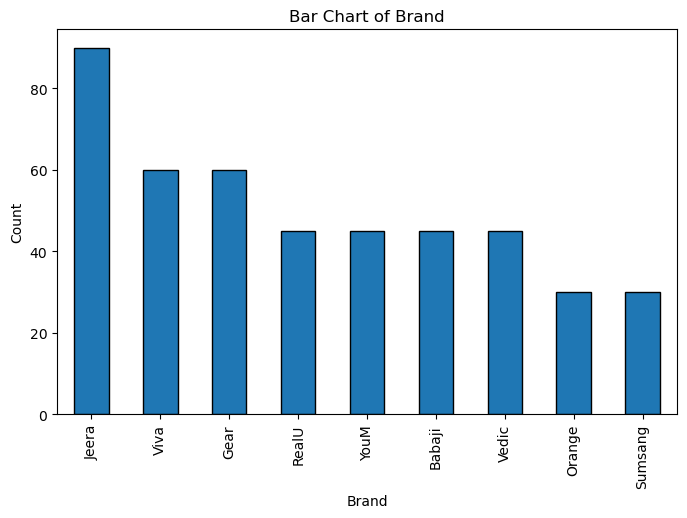

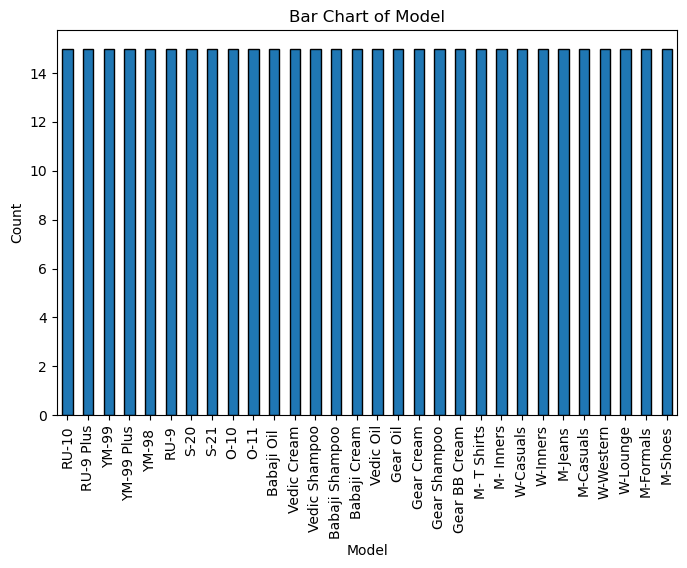

In [9]:
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    df[col].value_counts().plot(kind='bar', edgecolor='black')
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()
    

In [12]:
standardized_df = df.copy()
for col in numerical_cols:
    mean = df[col].mean()
    std = df[col].std()
    standardized_df[col] = (df[col] - mean) / std

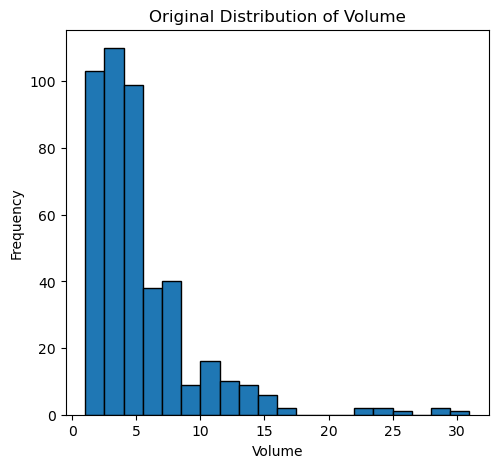

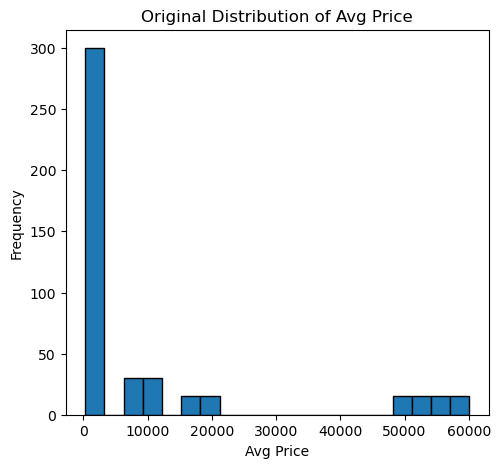

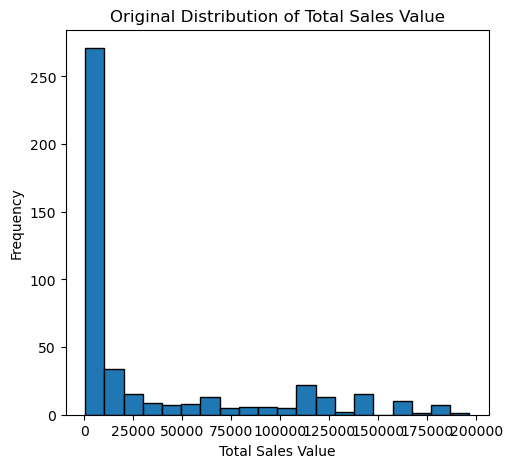

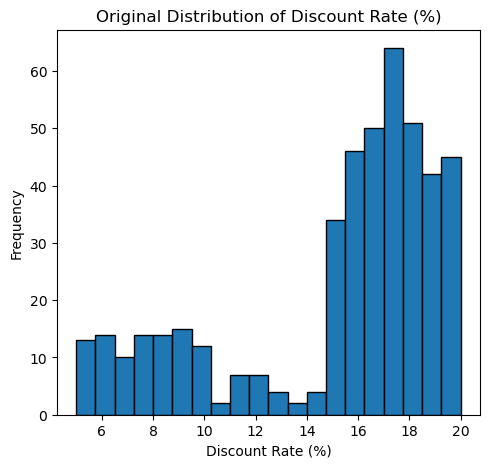

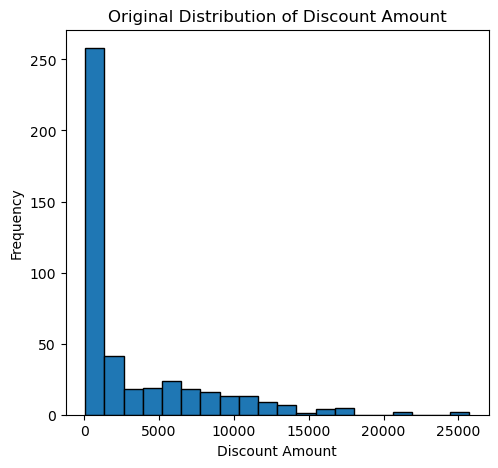

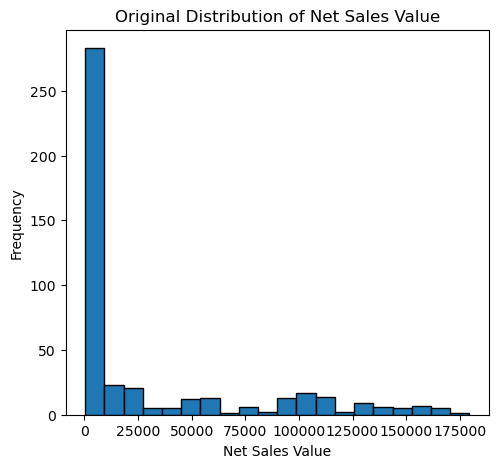

In [13]:
for col in numerical_cols:
    plt.figure(figsize=(12, 5))
    
    # Original distribution
    plt.subplot(1, 2, 1)
    plt.hist(df[col].dropna(), bins=20, edgecolor='black')
    plt.title(f"Original Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

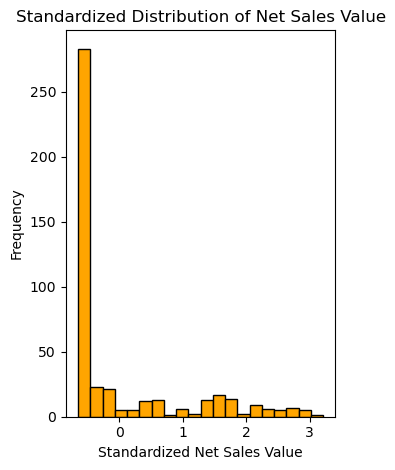

In [15]:
plt.subplot(1, 2, 2)
plt.hist(standardized_df[col].dropna(), bins=20, edgecolor='black', color='orange')
plt.title(f"Standardized Distribution of {col}")
plt.xlabel(f"Standardized {col}")
plt.ylabel("Frequency")
    
plt.tight_layout()
plt.show()
    

In [16]:
print(f"🔎 Summary for {col}:")
print(f"Original → Mean: {df[col].mean():.2f}, Std: {df[col].std():.2f}")
print(f"Standardized → Mean: {standardized_df[col].mean():.2f}, Std: {standardized_df[col].std():.2f}\n")

🔎 Summary for Net Sales Value:
Original → Mean: 30466.34, Std: 46358.66
Standardized → Mean: 0.00, Std: 1.00



In [17]:
encoded_df = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

In [18]:
print("🔎 Transformed Dataset (first 10 rows):")
encoded_df.head(10)

🔎 Transformed Dataset (first 10 rows):


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,3,8100,24300,16.996489,4130.146805,20169.853195,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,3,49100,147300,9.228812,13594.039719,133705.960281,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,2,54100,108200,5.553719,6009.124321,102190.875679,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,2,55100,110200,7.410104,8165.935144,102034.064856,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,3,60100,180300,9.928444,17900.983733,162399.016267,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
